In [65]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score
from get_nice_text import *

import pandas as pd
import re
import numpy as np

from sklearn.cluster import KMeans, Birch
from sklearn.cluster import AgglomerativeClustering, DBSCAN, MiniBatchKMeans, MeanShift, SpectralClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [19]:
def train_fast(df, Model, labels, **kwargs):
    """
    Trenuje Model na sparse matrix df
    @example
    train fast(df, KMeans, n_clusters=8)
    """
    trans = TfidfTransformer()
    df_trans = trans.fit_transform(df)
    model = Model(**kwargs)
    lab = model.fit_predict(df_trans)
    
    ret = {}
    
    ret["homogeneity_score"] = homogeneity_score(labels, lab)
    ret["completeness_score"] = completeness_score(labels, lab)
    ret["v_measure_score"] = v_measure_score(labels, lab)
    ret["sil_score"] = silhouette_score(df, lab)
    
    return lab, ret

In [9]:
df = get_nice_text()
labels = get_labels(True)
np.random.seed(123)

In [10]:
cv = CountVectorizer(stop_words = 'english')
df_count = cv.fit_transform(df)

In [11]:
_, lab = train_fast(df_count, Birch, n_clusters=8, labels=get_labels(merge_Bible=False))
lab

{'homogeneity_score': 0.5888784881508696,
 'completeness_score': 0.57217967047193,
 'v_measure_score': 0.5804089946671451,
 'sil_score': -0.09447535850597474}

In [12]:
_, ret = train_fast(df_count, Birch, n_clusters=5, labels=get_labels(merge_Bible=True))
ret

{'homogeneity_score': 0.43524996744878847,
 'completeness_score': 0.5485220154647363,
 'v_measure_score': 0.48536488845496295,
 'sil_score': -0.12179391430851084}

In [17]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.1 * (1 - .8)))

In [18]:
print(df_count.shape)

df_high_var = sel.fit_transform(df_count)
print(df_high_var.shape)

(590, 8067)
(590, 1255)


In [58]:
lab, ret = train_fast(df_count, KMeans, labels=get_labels(merge_Bible=False), n_clusters=8, random_state = 12)
ret

{'homogeneity_score': 0.481820054050061,
 'completeness_score': 0.4714029951506243,
 'v_measure_score': 0.4765546044932359}

In [59]:
lab, ret = train_fast(df_high_var, KMeans, labels=get_labels(merge_Bible=False), n_clusters=8, random_state = 12)
ret

{'homogeneity_score': 0.4798126853100102,
 'completeness_score': 0.4291710509743038,
 'v_measure_score': 0.45308118551615384}

In [42]:
for i in range(1,100):
    lab, scores = train_fast(df_high_var, DBSCAN, get_labels(True), eps = i/10, metric = 'manhattan')
    print(scores)

{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': 0.00591670181481978, 'completeness_score': 0.18240283455802805, 'v_measure_score': 0.01146161681410512}
{'homogeneity_score': 0.00591670181481978, 'completeness_score': 0.18240283455802805, 'v_measure_score': 0.01146161681410512}
{'homogeneity_score': 0.00591670181481978, 'co

{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_score': 1.0, 'v_measure_score': -8.474825258779785e-16}
{'homogeneity_score': -4.2374126293898904e-16, 'completeness_sco

In [16]:
for i in range(2,11):
    lab, ret = train_fast(df_count, KMeans, get_labels(True))
    print(ret)

{'homogeneity_score': 0.6520949753973273, 'completeness_score': 0.500958594024878, 'v_measure_score': 0.566621691669413, 'sil_score': -0.15582223494426653}
{'homogeneity_score': 0.6592084766570111, 'completeness_score': 0.48576139448851946, 'v_measure_score': 0.5593475198769859, 'sil_score': -0.09241508625674696}
{'homogeneity_score': 0.581306135253177, 'completeness_score': 0.450871853523789, 'v_measure_score': 0.5078476338696347, 'sil_score': -0.06854699430461515}
{'homogeneity_score': 0.6029124144460061, 'completeness_score': 0.4639731213854302, 'v_measure_score': 0.5243958146541724, 'sil_score': -0.19290203964520344}
{'homogeneity_score': 0.6727732283406263, 'completeness_score': 0.5494290605415507, 'v_measure_score': 0.6048772223177052, 'sil_score': -0.1610406398655968}
{'homogeneity_score': 0.6065505336844313, 'completeness_score': 0.4670791177415555, 'v_measure_score': 0.5277557074969148, 'sil_score': -0.10565820214195057}
{'homogeneity_score': 0.5471275309029067, 'completeness_

In [20]:
def train_fast(df, Model, labels, **kwargs):
    """
    Trenuje Model na sparse matrix df
    @example
    train fast(df, KMeans, n_clusters=8)
    """
    trans = TfidfTransformer()
    df_trans = trans.fit_transform(df)
    model = Model(**kwargs)
    lab = model.fit_predict(df_trans)
    
    ret = {}
    
    ret["homogeneity_score"] = homogeneity_score(labels, lab)
    ret["completeness_score"] = completeness_score(labels, lab)
    ret["v_measure_score"] = v_measure_score(labels, lab)
    ret["sil_score"] = silhouette_score(df, lab)
    
    return lab, ret, model

In [35]:
np.random.seed(123)
l = []
s = []
for i in range(2,11):
    lab, ret, m = train_fast(df_count, KMeans, get_labels(True), random_state = 123, n_clusters = i)
    l.append(m.inertia_)
    s.append(silhouette_score(df_count, lab))

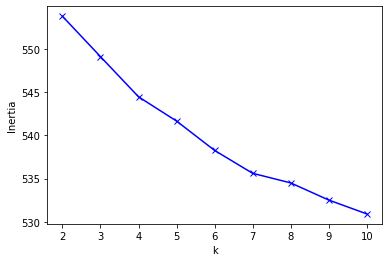

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), l, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

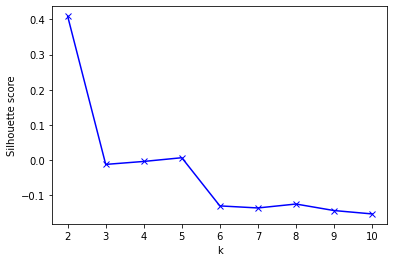

In [37]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), s, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

# KUBA COŚ SIE ZJEBAŁO, TSNE NIE WYGLADA TAK JAK WCZESNIEJ AAAA

In [52]:
labs = get_labels(merge_Bible=True)
colors = pd.Series(labs).astype('category').cat.codes.values

In [82]:
tsne = TSNE(n_components=2)

df = pd.read_csv('./AllBooks_baseline_DTM_Unlabelled.csv')

x = tsne.fit_transform(df)

<IPython.core.display.Javascript object>


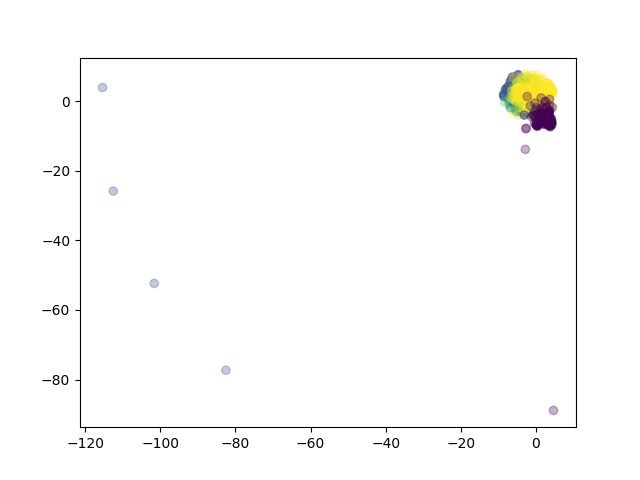

In [83]:
fig = plt.figure()
ax = fig.add_subplot()#111, projection='3d')

ax.scatter(x[:,0], x[:,1], c = colors,  alpha = 0.3)